In [1]:
# import packages and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import git
import copy
from sklearn.cluster import k_means

In [2]:
# import needed data
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
datadir = f"{homedir}" + "/models/clustering/"

In [3]:
# load in csvs for each cluster desired into dataframes
DataBasic = pd.read_csv('data_basic.csv')
DataDemographics = pd.read_csv('data_demographics.csv')
DataGeography = pd.read_csv('data_geography.csv')
DataHealth = pd.read_csv('data_health.csv')
DataTotal = pd.read_csv('data.csv')

In [4]:
# create county index hashtable
IndexFips = {}
for row in DataBasic.iterrows():
    row = row[1]
    IndexFips[int(row[0])] = int(row[1])
#print(IndexFips)

In [6]:
# convert each dataframe into np array

# Data Basic
DataBasic = DataBasic.drop(columns = ['Unnamed: 0', 'FIPS', 'UrbanRural', 'EconType', 'Policies', 'Movement'])
DataBasic = DataBasic.to_numpy()

# Data Demographics
DataDemographics = DataDemographics.drop(columns = ['Unnamed: 0', 'FIPS', 'Male', 'CollegePlus', 'Income', 'Unemployed'])
DataDemographics = DataDemographics.to_numpy()

# Data Geography
DataGeography = DataGeography.drop(columns = ['Unnamed: 0', 'FIPS', 'Density'])
DataGeography = DataGeography.to_numpy()

# Data Health
DataHealth = DataHealth.drop(columns = ['Unnamed: 0', 'FIPS', 'Hospitals'])
DataHealth = DataHealth.to_numpy()

# Data Total
DataTotal = DataTotal.drop(columns = ['Unnamed: 0', 'FIPS', 'UrbanRural', 'EconType', 'Policies', 'Movement', 'Male', 'CollegePlus', 'Income', 'Unemployed', 'Density', 'Hospitals'])
DataTotal = DataTotal.to_numpy()


In [7]:
# run k means clustering for each np array. Helper function

def cluster_data(data, min_k, max_k):
    errorBasic = []
    arrayBasic = []
    for j in range(min_k, max_k + 1):
        kmeansBasic = k_means(data, n_clusters=j, n_init=25)

        tempArray = []
        tempFips = []
        tempClusternum = []
        for i in range(0, len(kmeansBasic[1])):
            tempFips.append(IndexFips[i])
            tempClusternum.append(kmeansBasic[1][i])
        tempArray.append(tempFips)
        tempArray.append(tempClusternum)

        errorBasic.append(kmeansBasic[2])
        arrayBasic.append(tempArray)
    
    return (errorBasic, arrayBasic)

In [8]:
# plotting helper function

def plot_data(cluster, min_k, max_k, Factors):
    plt.plot([*range(min_k, max_k + 1)], cluster[0])
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.title('k vs Error: ' + Factors + ' factors') 

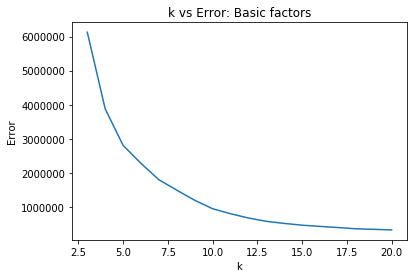

In [9]:
# get and plot Data Basic
clusterBasic = cluster_data(DataBasic, 3, 20)
plot_data(clusterBasic, 3, 20, 'Basic')

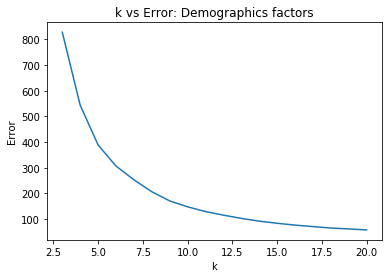

In [10]:
# get and plot Data Demographcis
clusterDemographics = cluster_data(DataDemographics, 3, 20)
plot_data(clusterDemographics, 3, 20, 'Demographics')

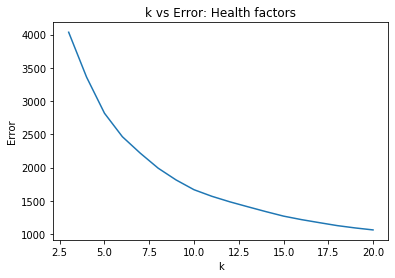

In [11]:
# get and plot Data Health
clusterHealth = cluster_data(DataHealth, 3, 20)
plot_data(clusterHealth, 3, 20, 'Health')

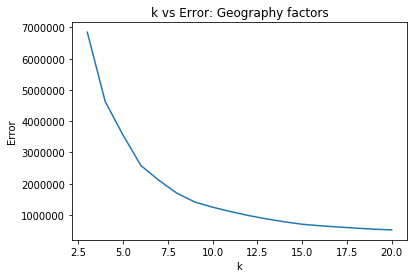

In [12]:
# get and plot Data Geography
clusterGeography = cluster_data(DataGeography, 3, 20)
plot_data(clusterGeography, 3, 20, 'Geography')

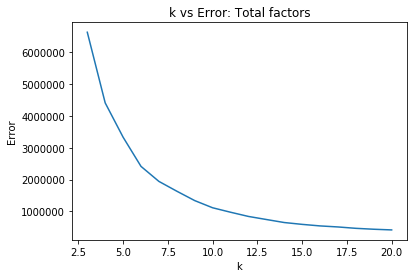

In [13]:
# get and plot Data Total
clusterTotal = cluster_data(DataTotal, 3, 20)
plot_data(clusterTotal, 3, 20, 'Total')

In [16]:
# helper function to write to CSV, many clusters here

def Data_ToCSV(k, clustering, Format):
    clustering = clustering[1][k - 3]
    clustering = np.array(clustering).T.tolist()
    clustering = pd.DataFrame(clustering)
    clustering.columns = ['FIPS', 'Cluster']
    clustering = clustering.set_index('FIPS')
    clustering.to_csv('%sclustering%d_%s.csv' % ('basic_', k, Format))

In [17]:
# write particular values of k from elbow method and use them to get CSVs

Data_ToCSV(7, clusterBasic, 'basic')
Data_ToCSV(7, clusterDemographics, 'demographics')
Data_ToCSV(7, clusterGeography, 'geography')
Data_ToCSV(10, clusterHealth, 'health')
Data_ToCSV(7, clusterTotal, 'total')